<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/NLP/Langchain/Mistral/MIstral_models_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection

### Get API Key

In [ ]:
from helper import load_mistral_api_key
api_key, dlai_endpoint = load_mistral_api_key(ret_key=True)

In [ ]:
import os
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage

def mistral(user_message, model="mistral-small-latest", is_json=False):
    client = MistralClient(api_key=api_key, endpoint=dlai_endpoint)
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, messages=messages, response_format={"type": "json_object"}
        )
    else:
        chat_response = client.chat(model=model, messages=messages)

    return chat_response.choices[0].message.content

## Mistral Small

Good for simple tasks, fast inference, lower cost.
- classification

In [ ]:
prompt = """
Classify the following email to determine if it is spam or not.
Only respond with the exact text "Spam" or "Not Spam".

# Email:
🎉 Urgent! You've Won a $1,000,000 Cash Prize!
💰 To claim your prize, please click on the link below:
https://bit.ly/claim-your-prize
"""

In [ ]:
%%time
mistral(prompt, model="mistral-small-latest")

CPU times: user 23.2 ms, sys: 170 µs, total: 23.4 ms
Wall time: 360 ms


'Spam'

## Mistral Medium

Good for intermediate tasks such as language transformation.
- Composing text based on provided context (e.g. writing a customer service email based on purchase information).

In [ ]:
prompt = """
Compose a welcome email for new customers who have just made
their first purchase with your product.
Start by expressing your gratitude for their business,
and then convey your excitement for having them as a customer.
Include relevant details about their recent order.
Sign the email with "The Fun Shop Team".

Order details:
- Customer name: Steven
- Product: Silly warhammer hat
- Estimate date of delivery: Aug. 25, 2024
- Return policy: 30 days
"""

In [ ]:
%%time
response_medium = mistral(prompt, model="mistral-medium-latest")

CPU times: user 24.7 ms, sys: 80 µs, total: 24.8 ms
Wall time: 9.42 s


In [ ]:
print(response_medium)

Subject: Welcome to The Fun Shop, Steven! Your Silly Warhammer Hat is on Its Way!

Dear Steven,

We are thrilled to welcome you to The Fun Shop family! We want to express our deepest gratitude for your recent purchase of the Silly Warhammer Hat. Your support means the world to us, and we're excited to have you as a customer.

We hope you're as excited as we are for your new Silly Warhammer Hat! This unique and quirky accessory is sure to bring a smile to your face and make any gathering more fun. Our team works hard to select only the best, most entertaining products, and we're confident that you'll love your new hat.

Your order is being carefully prepared and will be shipped shortly. You can expect your Silly Warhammer Hat to arrive on or around August 25, 2024. In the meantime, if you have any questions or concerns about your order, please don't hesitate to reach out to our customer service team at support@thefunshop.com.

We also want to remind you of our 30-day return policy. If f

## Mistral Large:

Good for complex tasks that require advanced reasoning.
- Math and reasoning with numbers.

In [ ]:
prompt = """
Calculate the difference in payment dates between the two \
customers whose payment amounts are closest to each other \
in the following dataset. Do not write code.

# dataset:
'{
  "transaction_id":{"0":"T1001","1":"T1002","2":"T1003","3":"T1004","4":"T1005"},
    "customer_id":{"0":"C001","1":"C002","2":"C003","3":"C002","4":"C001"},
    "payment_amount":{"0":125.5,"1":89.99,"2":120.0,"3":54.3,"4":210.2},
"payment_date":{"0":"2021-10-05","1":"2021-10-06","2":"2021-10-07","3":"2021-10-05","4":"2021-10-08"},
    "payment_status":{"0":"Paid","1":"Unpaid","2":"Paid","3":"Paid","4":"Pending"}
}'
"""

In [ ]:
%%time
response_small = mistral(prompt, model="mistral-small-latest")

CPU times: user 29.3 ms, sys: 0 ns, total: 29.3 ms
Wall time: 3.24 s


In [ ]:
print(response_small)

To find the difference in payment dates between the two customers whose payment amounts are closest to each other, we first need to identify these customers.

Looking at the "payment_amount" column, we can see that the closest payment amounts are 125.5 and 120.0. These amounts belong to customers C001 and C003 respectively.

Next, we find the payment dates for these customers from the "payment_date" column. For C001, the payment date is "2021-10-05" and for C003, the payment date is "2021-10-07".

The difference between these dates is 2 days (from 10-05 to 10-07).


In [ ]:
%%time
response_large = mistral(prompt, model="mistral-large-latest")

CPU times: user 24.3 ms, sys: 0 ns, total: 24.3 ms
Wall time: 8.83 s


In [ ]:
print(response_large)

To calculate the difference in payment dates between the two customers whose payment amounts are closest to each other, follow these steps:

1. **Identify the payment amounts**:
   - T1001: 125.5
   - T1002: 89.99
   - T1003: 120.0
   - T1004: 54.3
   - T1005: 210.2

2. **Find the two closest payment amounts**:
   - The closest payment amounts are 125.5 (T1001) and 120.0 (T1003).

3. **Identify the payment dates for these amounts**:
   - T1001: 2021-10-05
   - T1003: 2021-10-07

4. **Calculate the difference in payment dates**:
   - The difference between 2021-10-05 and 2021-10-07 is 2 days.

Therefore, the difference in payment dates between the two customers whose payment amounts are closest to each other is **2 days**.


## Expense reporting task

In [ ]:
transactions = """
McDonald's: 8.40
Safeway: 10.30
Carrefour: 15.00
Toys R Us: 20.50
Panda Express: 10.20
Beanie Baby Outlet: 25.60
World Food Wraps: 22.70
Stuffed Animals Shop: 45.10
Sanrio Store: 85.70
"""

prompt = f"""
Given the purchase details, how much did I spend on each category:
1) restaurants
2) groceries
3) stuffed animals and props
{transactions}
"""

In [ ]:
%%time
response_small = mistral(prompt, model="mistral-small-latest")

CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 3.5 s


In [ ]:
print(response_small)

You spent:
1) On restaurants: 8.40 (McDonald's) + 10.20 (Panda Express) = 18.60
2) On groceries: 10.30 (Safeway) + 15.00 (Carrefour) + 22.70 (World Food Wraps) = 48.00
3) On stuffed animals and props: 20.50 (Toys R Us) + 25.60 (Beanie Baby Outlet) + 45.10 (Stuffed Animals Shop) + 85.70 (Sanrio Store) = 176.90


In [ ]:
%%time
response_large = mistral(prompt, model="mistral-large-latest")

CPU times: user 28.9 ms, sys: 0 ns, total: 28.9 ms
Wall time: 13.3 s


In [ ]:
print(response_large)

Let's categorize the purchases and calculate the total spent on each category:

1) **Restaurants:**
   - McDonald's: $8.40
   - Panda Express: $10.20
   - World Food Wraps: $22.70

   Total spent on restaurants: $8.40 + $10.20 + $22.70 = $41.30

2) **Groceries:**
   - Safeway: $10.30
   - Carrefour: $15.00

   Total spent on groceries: $10.30 + $15.00 = $25.30

3) **Stuffed Animals and Props:**
   - Toys R Us: $20.50
   - Beanie Baby Outlet: $25.60
   - Stuffed Animals Shop: $45.10
   - Sanrio Store: $85.70

   Total spent on stuffed animals and props: $20.50 + $25.60 + $45.10 + $85.70 = $176.90

So, you spent:
- $41.30 on restaurants
- $25.30 on groceries
- $176.90 on stuffed animals and props


## Writing and checking code

In [ ]:
user_message = """
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Your code should pass these tests:

assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
"""

In [ ]:
%%time
result = mistral(user_message, model="mistral-large-latest")

CPU times: user 24.7 ms, sys: 213 µs, total: 25 ms
Wall time: 22.5 s


In [ ]:
print(result)

To solve the problem of finding two numbers in an array that add up to a given target, you can use a hash map (or dictionary in Python) to keep track of the numbers you have seen so far and their indices. This approach allows you to solve the problem in linear time, O(n).

Here's a step-by-step explanation and the corresponding Python code:

1. Initialize an empty dictionary to store the numbers and their indices.
2. Iterate through the array with an index.
3. For each number, calculate the complement that would add up to the target.
4. Check if the complement is already in the dictionary.
   - If it is, return the indices of the current number and the complement.
   - If it is not, add the current number and its index to the dictionary.
5. Since the problem guarantees exactly one solution, you can be sure that the loop will find the solution before completing.

Here's the implementation:

```python
def twoSum(nums, target):
    num_to_index = {}
    for index, num in enumerate(nums):


### Try out the code that the model provided
- Copy the code that the model provided and try running it!

Here is the code that was output at the time of filming:
```Python
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
```
- Also try running the assert statements in the original prompt
```Python
assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
```

In [ ]:
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i

In [ ]:
assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]

## Natively Fluent in English, French, Spanish, German, and Italian
- This means that you can use Mistral models for more than translating from one language to another.
- If you are a native Spanish speaker, for instance, you can communicate with Mistral models in Spanish for any of your tasks.

In [ ]:
user_message = """
Lequel est le plus lourd une livre de fer ou un kilogramme de plume
"""

In [ ]:
%%time
mistral(user_message, model="mistral-large-latest")

CPU times: user 24.2 ms, sys: 201 µs, total: 24.4 ms
Wall time: 12.1 s


"La question semble être un jeu de mots ou une énigme, car elle compare deux unités de poids différentes : une livre et un kilogramme.\n\n- Une livre (lb) est une unité de mesure de poids utilisée principalement dans les systèmes impériaux et américains.\n- Un kilogramme (kg) est une unité de mesure de poids utilisée dans le système métrique.\n\nPour comparer les deux, il faut convertir l'une des unités dans l'autre. Voici la conversion :\n\n1 livre ≈ 0,45359237 kilogramme\n\nDonc, si vous avez une livre de fer, cela équivaut à environ 0,45359237 kilogramme. Par conséquent, un kilogramme de plumes est plus lourd qu'une livre de fer, car 1 kilogramme est plus lourd que 0,45359237 kilogramme.\n\nEn résumé, un kilogramme de plumes est plus lourd qu'une livre de fer."

## List of Mistral models that you can call:

You can also call the two open source mistral models via API calls.
Here is the list of models that you can try:
```
open-mistral-7b
open-mixtral-8x7b
open-mixtral-8x22b
mistral-small-latest
mistral-medium-latest
mistral-large-latest
```

For example:
```Python
mistral(prompt, model="open-mixtral-8x22b")
```

Note that we just released the `open-mixtral-8x22b` model. Check out our [release blog](https://mistral.ai/news/mixtral-8x22b/) for details.

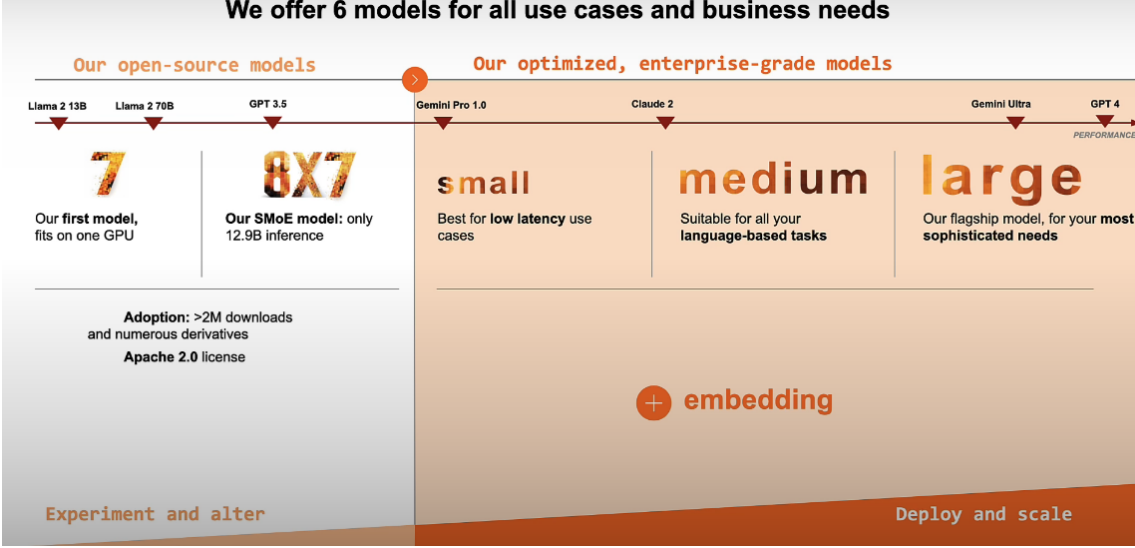